In [5]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Lista de IPs (alguns normais, outros suspeitos)
ips = ['192.168.0.1', '192.168.0.2', '10.0.0.5', '10.0.0.6', '172.16.0.10', '203.0.113.1', '203.0.113.2', '198.51.100.5']

# Lista de CPFs fictícios (apenas números sequenciais para exemplo)
cpfs = [f"{10000000000 + i}" for i in range(1, 51)]

# Tipos de requisição possíveis
tipos_requisicao = ['Consulta Pedido', 'Alteração Endereço', 'Consulta CPF']

# Função para gerar data e hora aleatória nos últimos 7 dias
def random_datetime():
    base = datetime.now()
    delta = timedelta(days=random.randint(0, 6), hours=random.randint(0, 23), minutes=random.randint(0, 59), seconds=random.randint(0, 59))
    return (base - delta).strftime('%Y-%m-%d %H:%M:%S')

# Criar lista para armazenar os logs
logs = []

# Gerar logs normais
for _ in range(300):
    ip = random.choice(ips[:6])  # IPs normais
    cpf = random.choice(cpfs)
    req = random.choice(tipos_requisicao)
    data_hora = random_datetime()
    logs.append([ip, cpf, req, data_hora])

# Gerar logs suspeitos: IP suspeito acessando muitos CPFs
ip_suspeito = ips[6]  # ex: '203.0.113.2'
for _ in range(50):
    cpf = random.choice(cpfs)
    req = random.choice(tipos_requisicao)
    data_hora = random_datetime()
    logs.append([ip_suspeito, cpf, req, data_hora])

# Criar DataFrame e salvar CSV
df_logs = pd.DataFrame(logs, columns=['ip', 'cpf_acessado', 'tipo_requisicao', 'data_hora'])
df_logs.to_csv('logs_snackexpress.csv', index=False)

print("Arquivo 'logs_snackexpress.csv' criado com sucesso!")


Arquivo 'logs_snackexpress.csv' criado com sucesso!


In [6]:
import pandas as pd

#Leitura do CSV
df = pd.read_csv('logs_snackexpress.csv')

# Ver primeiras linhas
print("🔍 Primeiros registros:")
print(df.head(), "\n")

# Ver estrutura geral
print("📌 Informações do DataFrame:")
print(df.info())

🔍 Primeiros registros:
            ip  cpf_acessado  tipo_requisicao            data_hora
0  192.168.0.2   10000000034  Consulta Pedido  2025-06-14 20:57:38
1  172.16.0.10   10000000034  Consulta Pedido  2025-06-08 18:17:08
2  203.0.113.1   10000000012     Consulta CPF  2025-06-15 11:37:33
3     10.0.0.6   10000000016     Consulta CPF  2025-06-08 16:57:16
4  172.16.0.10   10000000007  Consulta Pedido  2025-06-11 21:22:36 

📌 Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               350 non-null    object
 1   cpf_acessado     350 non-null    int64 
 2   tipo_requisicao  350 non-null    object
 3   data_hora        350 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.1+ KB
None


In [8]:
# Quantos CPFs únicos cada IP acessou
acessos_por_ip = df.groupby('ip')['cpf_acessado'].nunique().sort_values(ascending=False)

print("📊 CPFs únicos acessados por IP:")
print(acessos_por_ip)

📊 CPFs únicos acessados por IP:
ip
10.0.0.5       34
192.168.0.2    32
10.0.0.6       31
172.16.0.10    31
203.0.113.2    31
203.0.113.1    29
192.168.0.1    27
Name: cpf_acessado, dtype: int64


C:\Users\Na\AppData\Local\Temp\ipykernel_18508\1466471906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acessos_por_ip.index, y=acessos_por_ip.values, palette='Reds_r')


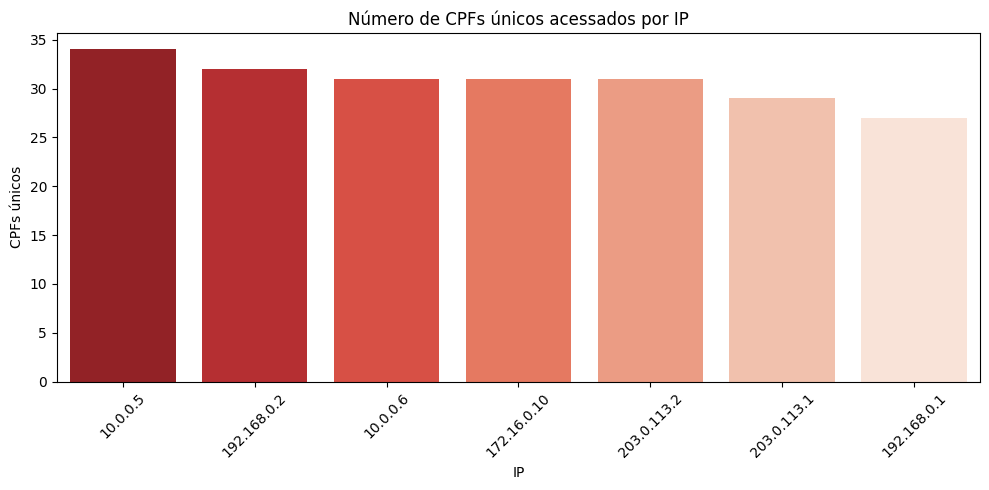

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico
plt.figure(figsize=(10,5))
sns.barplot(x=acessos_por_ip.index, y=acessos_por_ip.values, palette='Reds_r')
plt.title('Número de CPFs únicos acessados por IP')
plt.xlabel('IP')
plt.ylabel('CPFs únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# IPs Suspeitos
suspeitos = acessos_por_ip[acessos_por_ip > 20]
print("🚨 Ips com comportamento suspeito:")
print(suspeitos)

🚨 Ips com comportamento suspeito:
ip
10.0.0.5       34
192.168.0.2    32
10.0.0.6       31
172.16.0.10    31
203.0.113.2    31
203.0.113.1    29
192.168.0.1    27
Name: cpf_acessado, dtype: int64


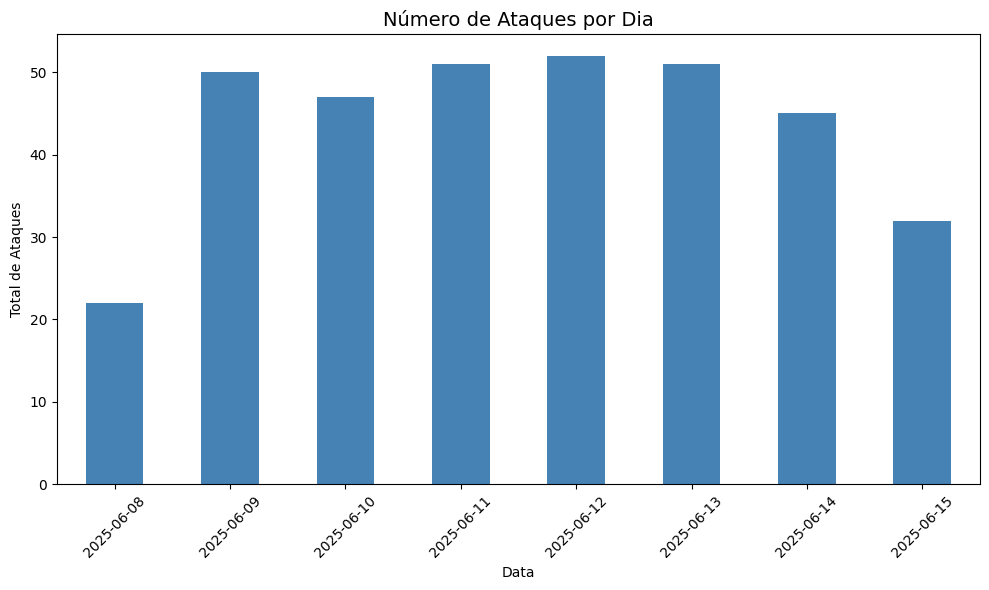

In [25]:
# Converter data_hora para datetime, se ainda não tiver feito
df['data_hora'] = pd.to_datetime(df['data_hora'])
df['data'] = df['data_hora'].dt.date

# Agrupamento por dia
ataques_por_dia = df['data'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ataques_por_dia.plot(kind="bar", color="steelblue")
plt.title("Número de Ataques por Dia", fontsize=14)
plt.xlabel("Data")
plt.ylabel("Total de Ataques")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/ataques_por_dia.png", dpi=300, bbox_inches='tight')
plt.show()


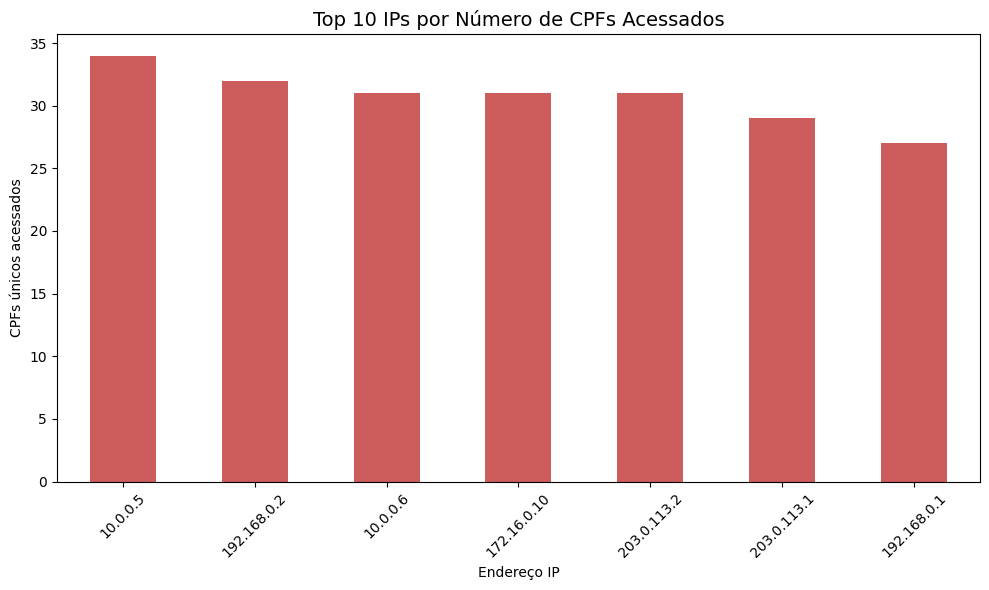

In [24]:
# Análise IPs mais suspeitos
ips_suspeitos = df.groupby("ip")["cpf_acessado"].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
ips_suspeitos.plot(kind='bar', color='indianred')
plt.title("Top 10 IPs por Número de CPFs Acessados", fontsize=14)
plt.xlabel("Endereço IP")
plt.ylabel("CPFs únicos acessados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/ips_suspeitos.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Na\AppData\Local\Temp\ipykernel_18508\1132075368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


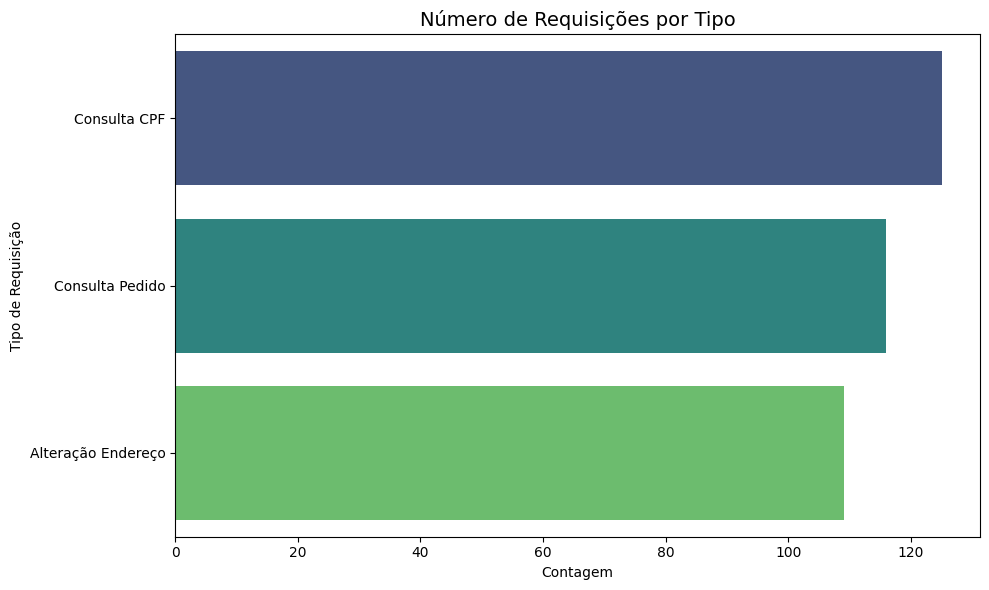

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=df, 
    y="tipo_requisicao", 
    order=df["tipo_requisicao"].value_counts().index, 
    palette="viridis"
)
plt.title("Número de Requisições por Tipo", fontsize=14)
plt.xlabel("Contagem")
plt.ylabel("Tipo de Requisição")
plt.tight_layout()

# Salva a imagem do gráfico
plt.savefig("images/requisicoes_por_tipo.png", dpi=300, bbox_inches='tight')
plt.show()
